In [1]:
# Necessary imports

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '../Data/GDC_Data/'

In [3]:
'''
We need to be able to determine which files are associated with
a given patient. The json file contains this information. Here
we are storing all the metadata.
'''

with open('../Data/GDC_Metadata.json') as file:
    json_string = file.readlines()
    json_string = ''.join(json_string)
metadata = json.loads(json_string)

In [4]:
'''
Making a dictionary where each key is the Case ID, and the value
is a list of the files associated with each patient.
'''

# Dictionary of Case IDs
case_id_dict = {}

# For each entry in the metadata from the json file
for entry in metadata:
    
    # Getting the case ID
    case_id = entry['associated_entities'][0]['case_id']
    # Getting the associated file name
    file_name = entry['file_name']
    
    # If the Case ID is already in the dictionary, add the file
    # name to the list of values
    if case_id in case_id_dict:
        case_id_dict[case_id].append(file_name)
    # If not already in the dictionary, add new key and value
    else:
        case_id_dict[case_id] = [file_name]

In [5]:
'''
Some patients don't have both the microRNA and mRNA files, so we
need to remove those from analysis. Some also have samples from
healthy tissue, which we will use later in the project but are
removing for now. Thus, we want patients that only have 2 files
associated to them.
'''

# List of Case IDs that have the right number of files
tumor_case_ids = []

# For each Case ID
for key in case_id_dict:
    # If they have 2 files, add them to the list of files to use
    if len(case_id_dict[key]) == 2:
        tumor_case_ids.append(key)

In [6]:
# Looking at microRNA counts for the first 10 patients

num_patients = 10
cases = tumor_case_ids[0:num_patients]

heatmap_data = np.empty((1881,), int)

# For each patient
for case in cases:
    # Get their case files
    case_files = case_id_dict[case]
    for file in case_files:
        # Get the microRNA file
        if file[-1] == 't':
            case_file_mirna = path + file
            # Load the microRNA file as an array
            mirnas = np.loadtxt(case_file_mirna, dtype='str')
            # Removing the column titles
            mirnas = np.delete(mirnas, 0, 0)
            # Getting the counts of the miRNAs and appending to
            # heatmap data
            miRNA_counts = mirnas[:,1].astype(float)
            heatmap_data = np.vstack([heatmap_data, miRNA_counts])

# Titles of each miRNA
miRNA_labels = mirnas[:,0]

# Removing the initialized file from the heatmap
heatmap_data = np.delete(heatmap_data, 0, 0)

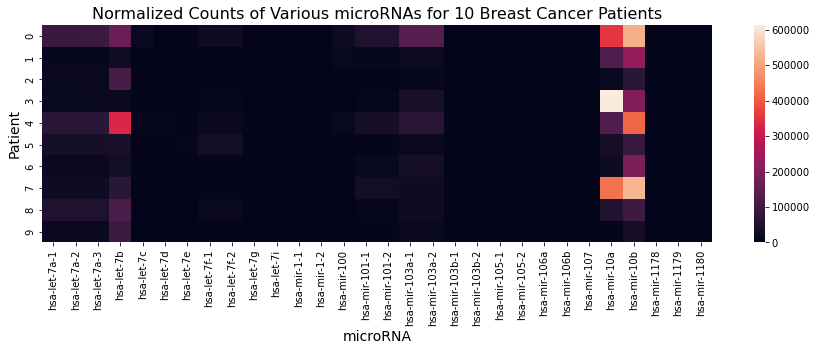

In [7]:
'''
Plotting a heatmap showing microRNA counts for the first 30
microRNAs for the first 10 patients.
'''
num_microRNAs = 30
plt.rcParams["figure.figsize"] = (15,4)
ax = sns.heatmap(heatmap_data[:, 0:num_microRNAs], 
                 xticklabels = miRNA_labels[0:num_microRNAs])
ax.set_xlabel('microRNA', fontsize = 14)
ax.set_ylabel('Patient', fontsize = 14)
ax.set_title('Normalized Counts of Various microRNAs for 10 ' + 
             'Breast Cancer Patients', fontsize = 16)
plt.savefig('../Figures/Heatmap', bbox_inches = 'tight')